In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rcwa
import solver

In [8]:
A = np.array([[2, 3],[1, 2]])
A[1,:]

array([1, 2])

In [8]:
np.diag(1/np.array([1,2,3,4,5]))

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.25      , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.2       ]])

In [3]:
M = 3
N = 3
mydevice = solver.Device()
mydevice.set_lattice(1, 1, M, N)
mydevice.add_layer_uniform(1, 1.45**2)

In [4]:
mydevice.set_incidence(0, 0, 1)
wls = np.arange(0.6, 1.6, 0.005)
Rs = []
Ts = []
RTs = []
for wl in wls:
    R,T = mydevice.compute_RT(wl, 1, 0, 1, 1)
    RT = R + T
    Rs.append(R[N,M])
    Ts.append(T[N,M])
    RTs.append(RT[N,M])

c:\Users\Haiwei PC\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\Users\Haiwei PC\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\Users\Haiwei PC\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


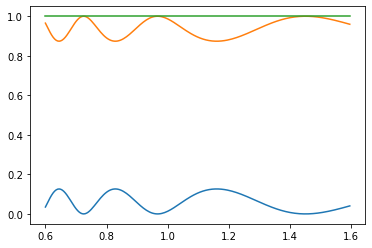

In [5]:
import matplotlib.pyplot as plt

plt.plot(wls, Rs)
plt.plot(wls, Ts)
plt.plot(wls, RTs)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rcwa
import solver

In [13]:
Kx, Ky = rcwa.create_k_space(1, 1, 0.5, 0, 2, 2, alpha=np.pi/2)

In [16]:
Kx

array([[-12.06637061,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,  -5.78318531,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.5       ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.    

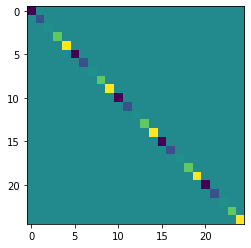

In [14]:
plt.imshow(Kx)

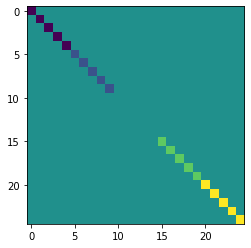

In [15]:
plt.imshow(Ky)

16384


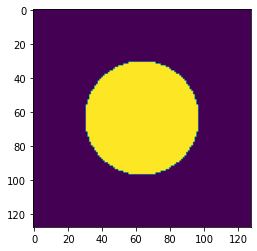

In [2]:
M = 2
N = 2
P = 0.35
R = 0.092
e_med = 1.45**2
e_si = 3.5**2
res = 128
x = np.linspace(-P/2, P/2, res)
y = np.linspace(-P/2, P/2, res)
X, Y = np.meshgrid(x, y)
mask = (X**2 + Y**2 <= R**2)
pillar = np.ones((res, res)) * e_med
pillar = pillar + (e_si - e_med) * mask
plt.imshow(pillar)

mydevice = solver.Device()
mydevice.set_lattice(P, P, M, N)
mydevice.add_layer_patterned(0.15, pillar)


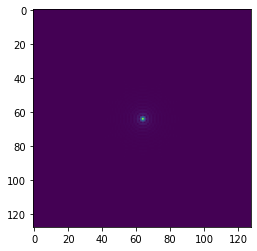

In [8]:
plt.imshow(np.abs(mydevice.layers[0].er_Fourier))

In [17]:
mydevice.set_incidence(0, 0, 1.45)
wls = np.arange(0.6, 0.7, 0.005)
Rs = []
Ts = []
RTs = []
for wl in wls:
    R,T = mydevice.compute_RT(wl, 1, 0, e_med, e_med)
    RT = R + T
    print(R[N,M])
    Rs.append(R[N,M])
    Ts.append(T[N,M])
    RTs.append(RT[N,M])

(0.023519783864512367+0j)
(0.024221768549360024+0j)
(0.02489743295965383+0j)
(0.025546519825181625+0j)
(0.02616888179369662+0j)
(0.026764470551591778+0j)
(0.027333326682556617+0j)
(0.02787557027493593+0j)
(0.02839139224846108+0j)
(0.028881046330434236+0j)
(0.02934484167039612+0j)
(0.02978313606932338+0j)
(0.03019632974244467+0j)
(0.030584859632640626+0j)
(0.030949194190850293+0j)
(0.031289828640752526+0j)
(0.03160728064967237+0j)
(0.03190208639975618+0j)
(0.03217479702900807+0j)
(0.03242597540512858+0j)


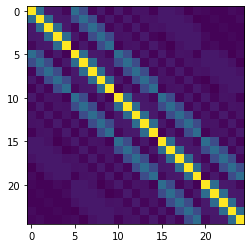

In [18]:
plt.imshow(np.abs(mydevice.layers[0].convolution_matrices[0]['matrix']))

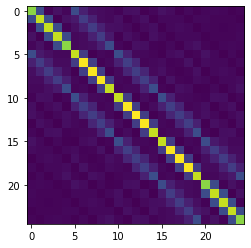

In [26]:
plt.imshow(np.abs(mydevice.layers[0].convolution_matrices[0]['matrix_inv']))

c:\Users\Haiwei PC\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\Users\Haiwei PC\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\Users\Haiwei PC\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


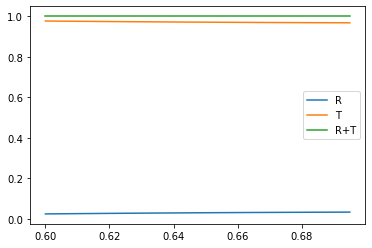

In [19]:
import matplotlib.pyplot as plt

plt.plot(wls, Rs, label='R')
plt.plot(wls, Ts, label='T')
plt.plot(wls, RTs, label='R+T')
plt.legend()

In [33]:
M = 5
N = 2
Px = 1
Py = 2
Kx, Ky, p, q = rcwa.create_k_space(Px, Py, 0, 0, M, N, alpha=np.pi/2)

In [4]:
a = np.zeros()
a[3]

In [10]:
b = np.array([1,2,3,4,5,6,7,8,9,10])

In [6]:
b.reshape((3,3))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [11]:
b[0:5]

array([1, 2, 3, 4, 5])

In [12]:
b[5:10]

array([ 6,  7,  8,  9, 10])

In [13]:
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])